In [ ]:
import sys
#!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install uproot3 pandas numpy matplotlib

In [1]:
import uproot3 # for reading .root files
import pandas as pd # to store data as dataframe
import time # to measure time to analyse
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import AutoMinorLocator # for minor ticks

BIGGER_SIZE = 16
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [18,8]
#plt.style.use('default')

import infofile # local file containing cross-sections, sums of weights, dataset IDs

In [2]:
#lumi = 0.5 # fb-1 # data_A only
#lumi = 1.9 # fb-1 # data_B only
#lumi = 2.9 # fb-1 # data_C only
#lumi = 4.7 # fb-1 # data_D only
lumi = 10 # fb-1 # data_A,data_B,data_C,data_D

fraction = 0.01 # reduce this is you want the code to run quicker
                                                                                                                                  
#tuple_path = r'C:\Users\jacob\Desktop\1lep/' # local
tuple_path = '../data/'
#tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/" # web address

MV2c10_cut = 0.8244


In [3]:
samples = {

    'data': {
        'list' : ['data_A','data_B','data_C','data_D'],
    },

    r'V+jets' : { # V+jets
        'list' : [

# ls | grep "36110[6-8]" | grep Z
'Zee'
,'Zmumu'
,'Ztautau'

# ls | grep "36110[0-5]" | grep W
,'Wplusenu'
,'Wplusmunu'
,'Wplustaunu'
,'Wminusenu'
,'Wminusmunu'
,'Wminustaunu'

# ls | grep "3641[0-9][0-9]" | grep W      
,'Wmunu_PTV0_70_CVetoBVeto'
,'Wmunu_PTV0_70_CFilterBVeto'
,'Wmunu_PTV0_70_BFilter'
,'Wmunu_PTV70_140_CVetoBVeto'
,'Wmunu_PTV70_140_CFilterBVeto'
,'Wmunu_PTV70_140_BFilter'
,'Wmunu_PTV140_280_CVetoBVeto'
,'Wmunu_PTV140_280_CFilterBVeto'
,'Wmunu_PTV140_280_BFilter'
,'Wmunu_PTV280_500_CVetoBVeto'
,'Wmunu_PTV280_500_CFilterBVeto'
,'Wmunu_PTV280_500_BFilter'
,'Wmunu_PTV500_1000'
,'Wmunu_PTV1000_E_CMS'
,'Wenu_PTV0_70_CVetoBVeto'
,'Wenu_PTV0_70_CFilterBVeto'
,'Wenu_PTV0_70_BFilter'
,'Wenu_PTV70_140_CVetoBVeto'
,'Wenu_PTV70_140_CFilterBVeto'
,'Wenu_PTV70_140_BFilter'
,'Wenu_PTV140_280_CVetoBVeto'
,'Wenu_PTV140_280_CFilterBVeto'
,'Wenu_PTV140_280_BFilter'
,'Wenu_PTV280_500_CVetoBVeto'
,'Wenu_PTV280_500_CFilterBVeto'
,'Wenu_PTV280_500_BFilter'
,'Wenu_PTV500_1000'
,'Wenu_PTV1000_E_CMS'
,'Wtaunu_PTV0_70_CVetoBVeto'
,'Wtaunu_PTV0_70_CFilterBVeto'
,'Wtaunu_PTV0_70_BFilter'
,'Wtaunu_PTV70_140_CVetoBVeto'
,'Wtaunu_PTV70_140_CFilterBVeto'
,'Wtaunu_PTV70_140_BFilter'
,'Wtaunu_PTV140_280_CVetoBVeto'
,'Wtaunu_PTV140_280_CFilterBVeto'
,'Wtaunu_PTV140_280_BFilter'
,'Wtaunu_PTV280_500_CVetoBVeto'
,'Wtaunu_PTV280_500_CFilterBVeto'
,'Wtaunu_PTV280_500_BFilter'
,'Wtaunu_PTV500_1000'
,'Wtaunu_PTV1000_E_CMS'

# ls | grep "3641[0-9][0-9]" | grep Z
,'Zmumu_PTV0_70_CVetoBVeto'
,'Zmumu_PTV0_70_CFilterBVeto'
,'Zmumu_PTV0_70_BFilter'
,'Zmumu_PTV70_140_CVetoBVeto'
,'Zmumu_PTV70_140_CFilterBVeto'
,'Zmumu_PTV70_140_BFilter'
,'Zmumu_PTV140_280_CVetoBVeto'
,'Zmumu_PTV140_280_CFilterBVeto'
,'Zmumu_PTV140_280_BFilter'
,'Zmumu_PTV280_500_CVetoBVeto'
,'Zmumu_PTV280_500_CFilterBVeto'
,'Zmumu_PTV280_500_BFilter'
,'Zmumu_PTV500_1000'
,'Zmumu_PTV1000_E_CMS'
,'Zee_PTV0_70_CVetoBVeto'
,'Zee_PTV0_70_CFilterBVeto'
,'Zee_PTV0_70_BFilter'
,'Zee_PTV70_140_CVetoBVeto'
,'Zee_PTV70_140_CFilterBVeto'
,'Zee_PTV70_140_BFilter'
,'Zee_PTV140_280_CVetoBVeto'
,'Zee_PTV140_280_CFilterBVeto'
,'Zee_PTV140_280_BFilter'
,'Zee_PTV280_500_CVetoBVeto'
,'Zee_PTV280_500_CFilterBVeto'
,'Zee_PTV280_500_BFilter'
,'Zee_PTV500_1000'
,'Zee_PTV1000_E_CMS'
,'Ztautau_PTV0_70_CVetoBVeto'
,'Ztautau_PTV0_70_CFilterBVeto'
,'Ztautau_PTV0_70_BFilter'
,'Ztautau_PTV70_140_CVetoBVeto'
,'Ztautau_PTV70_140_CFilterBVeto'
,'Ztautau_PTV70_140_BFilter'
,'Ztautau_PTV140_280_CVetoBVeto'
,'Ztautau_PTV140_280_CFilterBVeto'
,'Ztautau_PTV140_280_BFilter'
,'Ztautau_PTV280_500_CVetoBVeto'
,'Ztautau_PTV280_500_CFilterBVeto'
,'Ztautau_PTV280_500_BFilter'
,'Ztautau_PTV500_1000'
,'Ztautau_PTV1000_E_CMS'
        ],
        'color' : "#ff0000" # red
    },

    r'Single top' : { # Single top
        'list' : [
# ls | grep "410011\|410012\|410013\|410014\|410025\|410026"
'single_top_tchan'
,'single_antitop_tchan'
,'single_top_wtchan'
,'single_antitop_wtchan'
,'single_top_schan'
,'single_antitop_schan'
        ],
        'color' : "#00cdff" # light blue
    },
    
    r'Diboson' : { # Diboson
        # ls | grep "363359\|363360\|363492\|363356\|363490\|363358\|363489\|363491\|363493"
        'list' : ['ZqqZll','WqqZll','WpqqWmlv','WplvWmqq','WlvZqq','llll','lllv','llvv','lvvv'],
        'color' : "#00ff32" # green
    },

    r'$t\bar{t}$' : { # ttbar
        'list' : ['ttbar_lep'],
        'color' : "#6b59d3" # purple
    },
}



In [4]:
def get_data_from_files():
    data = {} # define empty dictionary to hold dataframes
    for s in samples: # loop over samples
        print('Processing '+s+' samples') # print which sample
        frames = [] # define empty list to hold data
        for val in samples[s]['list']: # loop over each file
            if s == 'data': prefix = "Data/" # Data prefix
            else: # MC prefix
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".1lep.root" # file name to open
            temp = read_file(fileString,val) # call the function read_file defined below
            frames.append(temp) # append dataframe returned from read_file to list of dataframes
        data[s] = pd.concat(frames) # dictionary entry is concatenated dataframes
    
    return data # return dictionary of dataframes

In [5]:
def calc_weight(xsec_weight, mcWeight, scaleFactor_PILEUP,
                scaleFactor_ELE, scaleFactor_MUON, 
                scaleFactor_LepTRIGGER ):
    return xsec_weight*mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER

In [6]:
def get_xsec_weight(sample):
    info = infofile.infos[sample] # open infofile
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"]) #*1000 to go from fb-1 to pb-1
    return xsec_weight # return cross-section weight

In [7]:
def calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E):
    # first lepton is [0], 2nd lepton is [1] etc
    px_0 = jet_pt[0]*math.cos(jet_phi[0]) # x-component of lep[0] momentum
    py_0 = jet_pt[0]*math.sin(jet_phi[0]) # y-component of lep[0] momentum
    pz_0 = jet_pt[0]*math.sinh(jet_eta[0]) # z-component of lep[0] momentum
    px_1 = jet_pt[1]*math.cos(jet_phi[1]) # x-component of lep[1] momentum
    py_1 = jet_pt[1]*math.sin(jet_phi[1]) # y-component of lep[1] momentum
    pz_1 = jet_pt[1]*math.sinh(jet_eta[1]) # z-component of lep[1] momentum
    px_2 = jet_pt[2]*math.cos(jet_phi[2]) # x-component of lep[2] momentum
    py_2 = jet_pt[2]*math.sin(jet_phi[2]) # y-component of lep[2] momentum
    pz_2 = jet_pt[2]*math.sinh(jet_eta[2]) # z-component of lep[3] momentum
    sumpx = px_0 + px_1 + px_2 # x-component of 4-lepton momentum
    sumpy = py_0 + py_1 + py_2 # y-component of 4-lepton momentum
    sumpz = pz_0 + pz_1 + pz_2 # z-component of 4-lepton momentum
    sumE = jet_E[0] + jet_E[1] + jet_E[2] # energy of 4-lepton system
    return math.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)/1000 #/1000 to go from MeV to GeV

In [8]:
# cut on lepton charge
# paper: "selecting two pairs of isolated leptons, each of which is comprised of two leptons with the same flavour and opposite charge"
def cut_lep_charge(lep_charge):
# throw away when sum of lepton charges is not equal to 0
# first lepton is [0], 2nd lepton is [1] etc
    return lep_charge[0] + lep_charge[1] + lep_charge[2] + lep_charge[3] != 0

# cut on lepton type
# paper: "selecting two pairs of isolated leptons, each of which is comprised of two leptons with the same flavour and opposite charge"
def cut_lep_type(lep_type):
# for an electron lep_type is 11
# for a muon lep_type is 13
# throw away when none of eeee, mumumumu, eemumu
    sum_lep_type = lep_type[0] + lep_type[1] + lep_type[2] + lep_type[3]
    return (sum_lep_type != 44) and (sum_lep_type != 48) and (sum_lep_type != 52)


def lep_par(lep_type):
# for an electron lep_type is 11
# for a muon lep_type is 13
#eemumu
    sum_lep_type = lep_type[0] + lep_type[1] + lep_type[2] + lep_type[3]
    return (sum_lep_type != 48)


def cut_lep_pt(lep_pt):
    return lep_pt < 30*1000

def cut_jet_n(jet_n):
    # og jet 4 større end 30GeV
    return jet_n < 4

# To b-tag over 0.8244
#def cut_btagging()

def b_tag_70(jet_MV2c10):
    return len([num for num in jet_MV2c10 if num > MV2c10_cut]) > 1

Cuts som kræver 1 lep
Samt 4 jets hvor 2 af jets har 70% sikkerhed

find invariant masse for 3 jets sammnenlagt. (der er 2 forskellige sammensætninger grundet 2 b jets.) 

In [9]:
def read_file(path,sample):
    start = time.time() # start the clock
    print("\tProcessing: "+sample) # print which sample is being processed
    data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
    tree = uproot3.open(path)["mini"] # open the tree called mini
    numevents = uproot3.numentries(path, "mini") # number of events
    
    # variables to calculate Monte Carlo weight
    if 'data' not in sample: xsec_weight = get_xsec_weight(sample) # get cross-section weight

    root_variables = ['lep_pt','lep_eta','lep_phi','lep_E','lep_charge','lep_type'
                  ,'met_et','met_phi'
                  ,'jet_n','jet_pt','jet_eta','jet_phi','jet_E','jet_MV2c10'
                  ,'mcWeight','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']
    
    for data in tree.iterate(root_variables, outputtype=pd.DataFrame, entrystop=numevents*fraction):    
        nIn = len(data.index) # number of events in this batch

        if 'data' not in sample: # only do this for Monte Carlo simulation files
            # multiply all Monte Carlo weights and scale factors together to give total weight
            data['totalWeight'] = np.vectorize(calc_weight)(xsec_weight,
                                                            data.mcWeight,
                                                            data.scaleFactor_PILEUP,
                                                            data.scaleFactor_ELE,
                                                            data.scaleFactor_MUON,
                                                            data.scaleFactor_LepTRIGGER)
    
        # cut jet number
        fail = data[ np.vectorize(cut_jet_n)(data.jet_n) ].index
        data.drop(fail, inplace=True)

        # cut lep pt
        fail = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ].index
        data.drop(fail, inplace=True)
        
        # b-tag
        data['b-tag'] = np.vectorize(b_tag_70)(data.jet_MV2c10)
    
        # Invariant mass
        data['mjjj'] = np.vectorize(calc_mjjj)(data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)

        nOut = len(data.index) # number of events passing cuts in this batch
        data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
        elapsed = time.time() - start # time taken to process
        print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after
      
    return data_all # return dataframe containing events passing all cuts

In [10]:
start = time.time() # time at start of whole processing
data = get_data_from_files() # process all files
elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Processing data samples
	Processing: data_A
		 nIn: 97964,	 nOut: 	1828	 in 2.9s
	Processing: data_B
		 nIn: 175460,	 nOut: 	3406	 in 4.9s
		 nIn: 173301,	 nOut: 	3327	 in 8.0s
	Processing: data_C
		 nIn: 175520,	 nOut: 	3595	 in 6.3s
		 nIn: 175520,	 nOut: 	3553	 in 9.6s
		 nIn: 159586,	 nOut: 	3217	 in 12.6s
	Processing: data_D
		 nIn: 175582,	 nOut: 	4336	 in 5.0s
		 nIn: 175582,	 nOut: 	3841	 in 8.5s
		 nIn: 175582,	 nOut: 	3594	 in 11.9s
		 nIn: 175582,	 nOut: 	3593	 in 15.5s
		 nIn: 25650,	 nOut: 	514	 in 16.6s
Processing V+jets samples
	Processing: Zee
		 nIn: 164429,	 nOut: 	1852	 in 4.4s
	Processing: Zmumu
		 nIn: 128170,	 nOut: 	1009	 in 4.8s
	Processing: Ztautau
		 nIn: 9869,	 nOut: 	197	 in 1.9s
	Processing: Wplusenu
		 nIn: 126342,	 nOut: 	521	 in 4.4s
	Processing: Wplusmunu
		 nIn: 133968,	 nOut: 	457	 in 4.7s
	Processing: Wplustaunu
		 nIn: 5509,	 nOut: 	40	 in 1.5s
	Processing: Wminusenu
		 nIn: 93956,	 nOut: 	378	 in 3.9s
	Processing: Wminusmunu
		 nIn: 110802,	 nOut: 

In [37]:
#d1 = tuple_path+'Data/data_A.1lep.root'\n",
d1 = tuple_path+'Data/data_A.1lep.root'
dtest = read_file(d1, 'data')
print('done')

	Processing: data
		 nIn: 97964,	 nOut: 	1828	 in 3.3s
done


In [38]:
dtest

,lep_pt,lep_eta,lep_phi,lep_E,lep_charge,lep_type,met_et,met_phi,jet_n,jet_pt,...,jet_phi,jet_E,jet_MV2c10,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,b-tag,mjjj
entry,,,,,,,,,,,,,,,,,,,,,
103,[111969.61],[-1.2983997],[0.61432594],[220378.48],[-1],[13],39748.914062,-0.590609,6,"[118696.42, 60372.133, 31864.127, 27943.557, 2...",...,"[3.062986, -2.3069797, 2.15417, -2.3827689, -0...","[120380.95, 67369.62, 98638.37, 28928.11, 2543...","[-0.39944443, -0.7963451, -0.8765587, -0.57160...",0.0,0.0,0.0,0.0,0.0,True,220.445346
137,[47394.902],[0.3454792],[1.2247137],[50251.58],[1],[11],29311.541016,-1.970879,5,"[63654.555, 59761.22, 33486.867, 22406.45, 202...",...,"[0.72087777, -2.2173972, -2.9363217, 1.7634941...","[90380.93, 156360.28, 50896.13, 28594.59, 5879...","[-0.8103455, 0.9210662, 0.92674536, 0.24246363...",0.0,0.0,0.0,0.0,0.0,True,243.160283
245,[53513.938],[-2.3587732],[-2.8392951],[285563.8],[-1],[11],9450.745117,-1.100348,4,"[76612.43, 33650.72, 29444.754, 20502.02]",...,"[1.6619253, -1.1125637, 1.0509864, -0.68988633]","[112763.875, 46739.355, 40293.11, 44196.86]","[0.7230937, -0.88048595, -0.8204317, -0.76844174]",0.0,0.0,0.0,0.0,0.0,False,183.696806
274,[141024.22],[0.8945215],[1.1199301],[201309.83],[-1],[11],12214.380859,-3.074841,4,"[125714.734, 27433.254, 24590.795, 23727.838]",...,"[-2.2333255, -2.753675, 0.06673221, -0.80602634]","[227682.8, 62054.703, 25850.162, 26134.527]","[0.36249486, -0.83090496, -0.7901678, -0.5917148]",0.0,0.0,0.0,0.0,0.0,False,158.489356
304,[31771.027],[0.43135178],[-0.7938594],[34772.87],[1],[11],17225.589844,-1.001861,4,"[48210.805, 27500.012, 25693.979, 23326.924]",...,"[2.8777747, 2.5501995, 0.045767356, 0.8746324]","[63390.29, 167941.67, 77893.61, 27390.354]","[-0.7281868, -0.6406239, -0.48251456, 0.37281978]",0.0,0.0,0.0,0.0,0.0,False,231.242500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97852,[31804.984],[-1.0359652],[-0.4259459],[50453.97],[-1],[11],80678.445312,-0.024620,4,"[40410.906, 36823.85, 23189.398, 21437.104]",...,"[2.9385722, 2.1738582, -2.6832116, -2.861757]","[41872.414, 219750.12, 23791.19, 27521.773]","[-0.88619184, -0.4946545, -0.9319134, -0.8387028]",0.0,0.0,0.0,0.0,0.0,False,151.236124
97905,[36937.188],[-1.894137],[2.5356464],[125535.8],[1],[11],66697.578125,-1.895543,7,"[212612.06, 125002.18, 121028.555, 93087.875, ...",...,"[1.1575289, -2.8671796, -0.9392489, -1.9099176...","[438907.2, 128961.1, 122326.03, 99811.336, 847...","[0.93769914, -0.8283072, -0.9142579, -0.928804...",0.0,0.0,0.0,0.0,0.0,False,576.761226
97924,[42523.633],[-1.2165221],[2.557062],[78066.73],[-1],[11],24643.478516,-2.326959,5,"[49336.734, 48841.76, 39445.22, 31867.463, 253...",...,"[0.25062567, -0.49713036, -3.0540562, 0.107529...","[73823.06, 83607.92, 40133.555, 44595.973, 379...","[-0.80824053, -0.76214516, -0.91476977, -0.120...",0.0,0.0,0.0,0.0,0.0,False,189.274624


In [43]:
data['data']

,lep_pt,lep_eta,lep_phi,lep_E,lep_charge,lep_type,met_et,met_phi,jet_n,jet_pt,jet_eta,jet_phi,jet_E,jet_MV2c10,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER
entry,,,,,,,,,,,,,,,,,,,
103,[111969.61],[-1.2983997],[0.61432594],[220378.48],[-1],[13],39748.914062,-0.590609,6,"[118696.42, 60372.133, 31864.127, 27943.557, 2...","[0.14715476, 0.45665833, -1.7943488, -0.157266...","[3.062986, -2.3069797, 2.15417, -2.3827689, -0...","[120380.95, 67369.62, 98638.37, 28928.11, 2543...","[-0.39944443, -0.7963451, -0.8765587, -0.57160...",0.0,0.0,0.0,0.0,0.0
137,[47394.902],[0.3454792],[1.2247137],[50251.58],[1],[11],29311.541016,-1.970879,5,"[63654.555, 59761.22, 33486.867, 22406.45, 202...","[0.87740463, 1.6152775, -0.9683505, -0.7135607...","[0.72087777, -2.2173972, -2.9363217, 1.7634941...","[90380.93, 156360.28, 50896.13, 28594.59, 5879...","[-0.8103455, 0.9210662, 0.92674536, 0.24246363...",0.0,0.0,0.0,0.0,0.0
245,[53513.938],[-2.3587732],[-2.8392951],[285563.8],[-1],[11],9450.745117,-1.100348,4,"[76612.43, 33650.72, 29444.754, 20502.02]","[-0.9297579, 0.83875006, 0.82860243, 1.3978581]","[1.6619253, -1.1125637, 1.0509864, -0.68988633]","[112763.875, 46739.355, 40293.11, 44196.86]","[0.7230937, -0.88048595, -0.8204317, -0.76844174]",0.0,0.0,0.0,0.0,0.0
274,[141024.22],[0.8945215],[1.1199301],[201309.83],[-1],[11],12214.380859,-3.074841,4,"[125714.734, 27433.254, 24590.795, 23727.838]","[-1.1971732, -1.4551935, 0.26198015, -0.4266414]","[-2.2333255, -2.753675, 0.06673221, -0.80602634]","[227682.8, 62054.703, 25850.162, 26134.527]","[0.36249486, -0.83090496, -0.7901678, -0.5917148]",0.0,0.0,0.0,0.0,0.0
304,[31771.027],[0.43135178],[-0.7938594],[34772.87],[1],[11],17225.589844,-1.001861,4,"[48210.805, 27500.012, 25693.979, 23326.924]","[-0.76273036, 2.4953797, 1.7710013, 0.536971]","[2.8777747, 2.5501995, 0.045767356, 0.8746324]","[63390.29, 167941.67, 77893.61, 27390.354]","[-0.7281868, -0.6406239, -0.48251456, 0.37281978]",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727878,[90278.79],[0.56674963],[-0.37862673],[105170.125],[-1],[13],54786.265625,0.377996,4,"[86142.14, 46488.8, 25101.37, 22406.28]","[1.6894752, 0.54968923, 1.2259622, 1.1759617]","[-2.7313006, 2.4391892, 2.0900211, -0.07973707]","[241497.0, 54356.227, 46740.35, 40178.016]","[0.99665827, -0.92946476, 0.9952915, -0.86203456]",0.0,0.0,0.0,0.0,0.0
727882,[64496.273],[0.33676243],[0.852107],[68188.27],[-1],[13],122992.359375,2.782380,5,"[120954.9, 118519.3, 77315.91, 27436.275, 2080...","[1.2975812, 0.89300126, -0.28056353, -1.699838...","[-2.4125643, -0.9827237, 0.84669864, -2.459800...","[238541.14, 170590.38, 80796.13, 77759.69, 367...","[-0.40701777, -0.69742703, 0.9899328, -0.79589...",0.0,0.0,0.0,0.0,0.0
727917,[39246.008],[0.44926003],[-3.1157613],[43273.67],[-1],[11],59414.246094,0.333815,6,"[29543.574, 25070.969, 23842.879, 23203.941, 2...","[2.2674816, -1.279188, 1.5391731, -2.3316553, ...","[1.174762, -2.734238, -2.3327072, -1.9631002, ...","[144281.97, 48743.734, 58279.22, 120662.39, 36...","[0.07570415, -0.32005787, -0.8813957, -0.72132...",0.0,0.0,0.0,0.0,0.0


In [64]:
def plot_data(data):

    xmin = 100 # GeV
    xmax = 240 # GeV
    step_size = 5 # GeV

    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

    data_x,_ = np.histogram(data['data']['mjjj'], 
                            bins=bin_edges ) # histogram the data
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    signal_x = data[r'$t\bar{t}$']['mjjj'] # histogram the signal
    signal_weights = data[r'$t\bar{t}$'].totalWeight # get the weights of the signal events
    signal_color = samples[r'$t\bar{t}$']['color'] # get the colour for the signal bar

    mc_x = [] # define list to hold the Monte Carlo histogram entries
    mc_weights = [] # define list to hold the Monte Carlo weights
    mc_colors = [] # define list to hold the colors of the Monte Carlo bars
    mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

    for s in samples: # loop over samples
        if s not in ['data', r'$t\bar{t}$']: # if not data nor signal
            mc_x.append( data[s]['mjjj'] ) # append to the list of Monte Carlo histogram entries
            mc_weights.append( data[s].totalWeight ) # append to the list of Monte Carlo weights
            mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels
    


    # *************
    # Main plot 
    # *************
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data') 
    
    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )
    
    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
    mc_x_err = np.sqrt( mc_x_tot ) # statistical error on the MC bars
        
    # plot the signal bar
    mc_signal = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, 
                   weights=signal_weights, color=signal_color,
                   label=r'$t\bar{t}$')
    
    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot+mc_signal[0]-mc_x_err, color='none',
                  hatch="////", width=step_size, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis
    
    # x-axis label
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                        fontsize=13, x=1, horizontalalignment='right')
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                         y=1, horizontalalignment='right') 
    
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )
    
    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.93, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.88, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.82, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes
    
    # Add a label for the analysis carried out
    plt.text(0.05, # x
             0.76, # y
             r'$H \rightarrow ZZ^* \rightarrow 4\ell$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend( frameon=False ) # no box around the legend
    
    return

def plot_data_btag(data):

    xmin = 100 # GeV
    xmax = 240 # GeV
    step_size = 5 # GeV

    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
    bin_centres = np.arange(start=xmin+step_size/2, # The interval includes this value
                            stop=xmax+step_size/2, # The interval doesn't include this value
                            step=step_size ) # Spacing between values

#    data['data'].loc[data['data']['b-tag'] == True]['mjjj']
    
    data_x,_ = np.histogram(data['data'].loc[data['data']['b-tag'] == True]['mjjj'], 
                            bins=bin_edges ) # histogram the data
    data_x_errors = np.sqrt( data_x ) # statistical error on the data

    signal_x = data[r'$t\bar{t}$'].loc[data[r'$t\bar{t}$']['b-tag'] == True]['mjjj'] # histogram the signal
    signal_weights = data[r'$t\bar{t}$'].loc[data[r'$t\bar{t}$']['b-tag'] == True].totalWeight # get the weights of the signal events
    signal_color = samples[r'$t\bar{t}$']['color'] # get the colour for the signal bar

    mc_x = [] # define list to hold the Monte Carlo histogram entries
    mc_weights = [] # define list to hold the Monte Carlo weights
    mc_colors = [] # define list to hold the colors of the Monte Carlo bars
    mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

    for s in samples: # loop over samples
        if s not in ['data', r'$t\bar{t}$']: # if not data nor signal
            mc_x.append( data[s].loc[data[s]['b-tag'] == True]['mjjj'] ) # append to the list of Monte Carlo histogram entries
            mc_weights.append( data[s].loc[data[s]['b-tag'] == True].totalWeight ) # append to the list of Monte Carlo weights
            mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
            mc_labels.append( s ) # append to the list of Monte Carlo legend labels
    


    # *************
    # Main plot 
    # *************
    main_axes = plt.gca() # get current axes
    
    # plot the data points
    main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,
                       fmt='ko', # 'k' means black and 'o' is for circles 
                       label='Data') 
    
    # plot the Monte Carlo bars
    mc_heights = main_axes.hist(mc_x, bins=bin_edges, 
                                weights=mc_weights, stacked=True, 
                                color=mc_colors, label=mc_labels )
    
    mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value
    mc_x_err = np.sqrt( mc_x_tot ) # statistical error on the MC bars
        
    # plot the signal bar
    mc_signal = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot, 
                   weights=signal_weights, color=signal_color,
                   label=r'$t\bar{t}$')
    
    # plot the statistical uncertainty
    main_axes.bar(bin_centres, # x
                  2*mc_x_err, # heights
                  alpha=0.5, # half transparency
                  bottom=mc_x_tot+mc_signal[0]-mc_x_err, color='none',
                  hatch="////", width=step_size, label='Stat. Unc.' )

    # set the x-limit of the main axes
    main_axes.set_xlim( left=xmin, right=xmax ) 
    
    # separation of x axis minor ticks
    main_axes.xaxis.set_minor_locator( AutoMinorLocator() ) 
    
    # set the axis tick parameters for the main axes
    main_axes.tick_params(which='both', # ticks on both x and y axes
                          direction='in', # Put ticks inside and outside the axes
                          top=True, # draw ticks on the top axis
                          right=True ) # draw ticks on right axis
    
    # x-axis label
    main_axes.set_xlabel(r'4-lepton invariant mass $\mathrm{m_{4l}}$ [GeV]',
                        fontsize=13, x=1, horizontalalignment='right')
    
    # write y-axis label for main axes
    main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                         y=1, horizontalalignment='right') 
    
    # set y-axis limits for main axes
    main_axes.set_ylim( bottom=0, top=np.amax(data_x)*1.6 )
    
    # add minor ticks on y-axis for main axes
    main_axes.yaxis.set_minor_locator( AutoMinorLocator() ) 

    # Add text 'ATLAS Open Data' on plot
    plt.text(0.05, # x
             0.93, # y
             'ATLAS Open Data', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             fontsize=13 ) 
    
    # Add text 'for education' on plot
    plt.text(0.05, # x
             0.88, # y
             'for education', # text
             transform=main_axes.transAxes, # coordinate system used is that of main_axes
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.05, # x
             0.82, # y
             '$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', # text
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes
    
    # Add a label for the analysis carried out
    plt.text(0.05, # x
             0.76, # y
             r'$H \rightarrow ZZ^* \rightarrow 4\ell$', # text 
             transform=main_axes.transAxes ) # coordinate system used is that of main_axes

    # draw the legend
    main_axes.legend( frameon=False ) # no box around the legend
    
    return

In [59]:
data['data'].loc[data['data']['b-tag'] == True]['mjjj']

entry
103       220.445346
137       243.160283
742       510.182089
759       183.110773
1080      148.196486
             ...    
726698    287.966005
727033    420.563073
727278    318.992922
727797    169.049702
727878    126.894723
Name: mjjj, Length: 4043, dtype: float64

In [22]:
data['data']

1

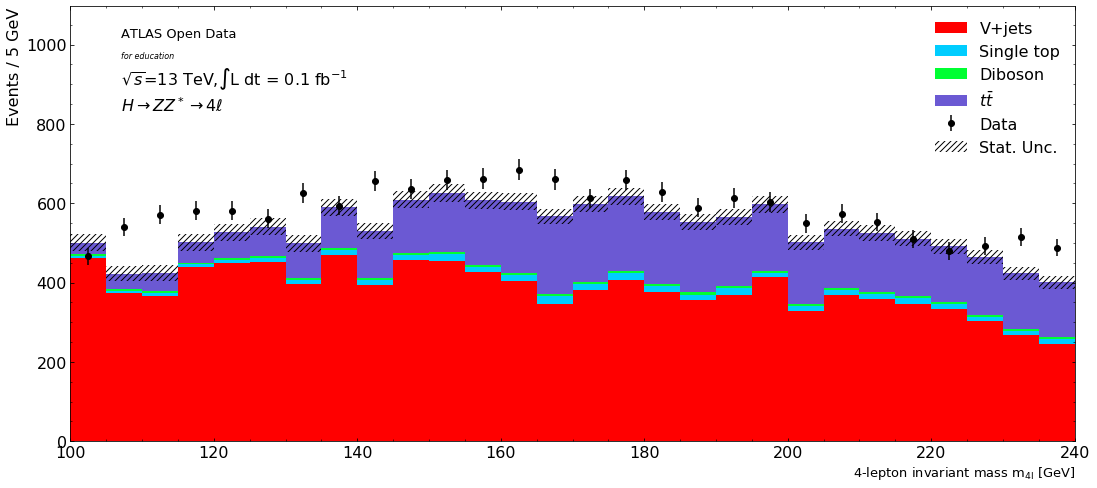

/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:178: RuntimeWarning: invalid value encountered in sqrt


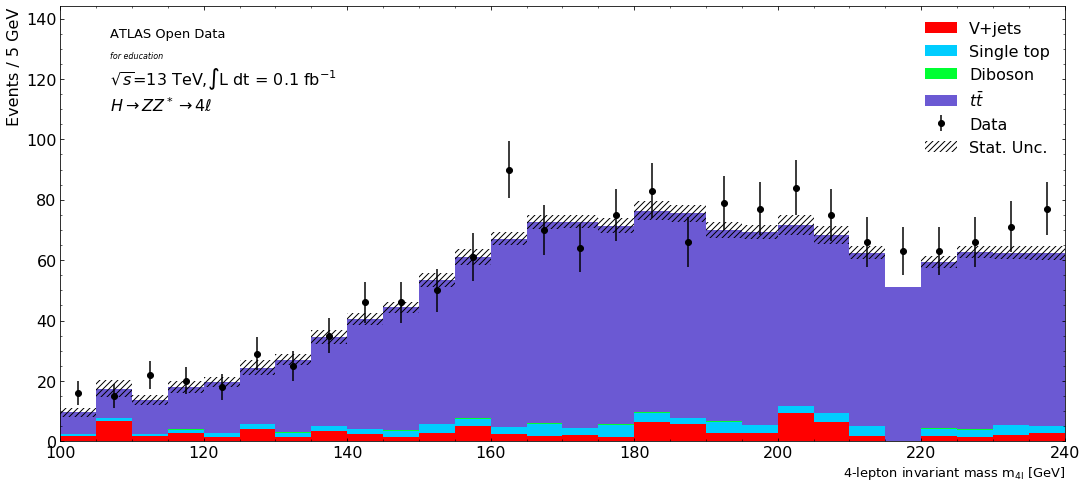

In [66]:
plot_data(data)
plt.show()
plot_data_btag(data)

### Kode til bedste valg af jets

In [ ]:
#finder alle kombinationer af 3 jets

from itertools import combinations 

# alle kombinationer af 3 jets og deres x,y momentum, vælg den største

#tjekker om der kun er én b-tagget i en kombination
def en_btag_tjek(data):
    filtered = list(filter(lambda d: d[0] > 0.8244, data))
    return len(filtered) == 1


#regner den invariante masse af de udvalgte

def mjjj_bedste(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E):
    samlet = zip(jet_MV2c10, jet_pt, jet_eta, jet_phi, jet_E)
    #laver mulige kombinationer
    comb = combinations(samlet, 3)
    en_btagget_comb = list(filter(en_btag_tjek, comb)) #tager en række og har nu lavet liste med rigtige komb.liste med tre tupler
    def regn_mjjj(jets_kombi): #laver fem lister med tre værdier i hver liste
        res = list(zip(*jets_kombi))
        return calc_mjjj(res[1],res[2],res[3],res[4])
    topkvark_masse = 172
    mjjj = np.array([regn_mjjj(jets) for jets in en_btagget_comb]) # tager hver element i listen en_btagget_comb og beregner invariant masse 
    bedste = np.argmin(np.abs(mjjj - topkvark_masse)) #hvilket index i listen er mindst
    return mjjj[bedste] #slår op og får værdien

#data['mjjj'] = np.vectorize(calc_mjjj)(data.jet_MV2c10, data.jet_pt,data.jet_eta,data.jet_phi,data.jet_E)
#calc_mjjj(jet_pt,jet_eta,jet_phi,jet_E)

#finder den med højeste værdi